<center><font size="6"><b>Detection of Knee Osteoarthritis from X-Ray Images:<font color='magenta'> Data Wrangling</b></font></font></center>

<h2><center><a href="https://www.linkedin.com/in/sonjoydas/"><font color='blue'>Sonjoy Das, PhD</font></a></center></h2>

The entire data science pipeline of this work on image classification for Knee Osteoarthritis conditions will loosely follow the basic strcuture of Tensorflow's Advanced tutorial on [Image Classificatiton](https://www.tensorflow.org/tutorials/images/classification).

This is the **first notebook** for this projec. It contains the steps related to **Data Wrangling** and the necessary explanations.

+ **(this notebook)**. Data Wrangling

## 1.1 Imports<a id='1.1_Imports'></a>

In [1]:
# Import the necessary libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# To create colorbar in subplots
from mpl_toolkits.axes_grid1 import make_axes_locatable

# For "findSubfolder_files(folder_path)" function
from pathlib import Path

# For "find_imageSize(p_subfolder)" function
from PIL import Image
import glob

# To combine all the images
import shutil
import os

# To save some data
import pickle

2022-11-18 17:30:33.131846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.10.0


## 1.2 Explore Image Files and Subdirectories of Input Data<a id='1.2_Image_Files_and_Subdirectories_of_Input_Data'></a>

Here, let us explore how many image files are there and their image sizes, etc.

### 1.2.1 Input Directory Structure<a id='1.2.1_Input_Directory_Structure'></a>

The dataset is downloaded in the following subfolder '/KneeXrayImages'. Include the paths for different data sets.

In [3]:
image_folder_path = 'KneeXrayImages/'

# Training folder
train_folder = image_folder_path + 'train'

# Validation folder
val_folder = image_folder_path + 'val'

# Test folder
test_folder = image_folder_path + 'test'

# Autotest folder
autotest_folder = image_folder_path + 'auto_test'

In [4]:
# Define a function to query subfolders of a folder and the files in them
# Ref: https://www.tensorflow.org/tutorials/load_data/images

def findSubfolder_files(folder_path):
    p = Path(folder_path)
    p_subfolder = [(x, len(list(Path(str(x)).glob('*.*')))) for x in p.iterdir() if x.is_dir()]
    p_subfolder = sorted(p_subfolder)

    print(pd.DataFrame(p_subfolder, columns = ['Subfolder', '# of images']))

    image_count = sum([i[1] for i in p_subfolder])
    print('Total files: ' + str(image_count))
    
    return image_count, p_subfolder


In [5]:
train_image_count, train_subfolder = findSubfolder_files(train_folder)

                Subfolder  # of images
0  KneeXrayImages/train/0         2286
1  KneeXrayImages/train/1         1046
2  KneeXrayImages/train/2         1516
3  KneeXrayImages/train/3          757
4  KneeXrayImages/train/4          173
Total files: 5778


In [6]:
val_image_count, val_subfolder = findSubfolder_files(val_folder)

              Subfolder  # of images
0  KneeXrayImages/val/0          328
1  KneeXrayImages/val/1          153
2  KneeXrayImages/val/2          212
3  KneeXrayImages/val/3          106
4  KneeXrayImages/val/4           27
Total files: 826


In [7]:
test_image_count, test_subfolder  = findSubfolder_files(test_folder)

               Subfolder  # of images
0  KneeXrayImages/test/0          639
1  KneeXrayImages/test/1          296
2  KneeXrayImages/test/2          447
3  KneeXrayImages/test/3          223
4  KneeXrayImages/test/4           51
Total files: 1656


In [8]:
autotest_image_count, autotest_subfolder  = findSubfolder_files(autotest_folder)

                    Subfolder  # of images
0  KneeXrayImages/auto_test/0          604
1  KneeXrayImages/auto_test/1          275
2  KneeXrayImages/auto_test/2          403
3  KneeXrayImages/auto_test/3          200
4  KneeXrayImages/auto_test/4           44
Total files: 1526


Names of different subfolders and total number of files for each directory are printed above. We will verify later if all of them are image files and which format they are in!

In [9]:
# Define a function to find out the range of sizes of images in folder with many subfolders

# The size determined here will be used as an input to load the images later through 
# tf.keras.preprocessing.image_dataset_from_directory()
# See also: https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5

def find_imageShape(p_subfolder):

    image_sizeX = []
    image_sizeY = []
    channel_list = []
    
    total_files = 0

    
    for i in range(len(p_subfolder)):
        # Specify .png format explicitly. This will verify if all image files 
        # are indeed in .png format
        # Ref for glob: https://towardsdatascience.com/the-python-glob-module-47d82f4cbd2d
        for filename in glob.glob(str(p_subfolder[i][0]) + '/*.png'): 
            total_files += 1
            im=Image.open(filename)
            image_sizeX.append(im.size[0])
            image_sizeY.append(im.size[1])
            
            # Determine # of channels:
            # https://stackoverflow.com/questions/52962969/number-of-channels-in-pil-pillow-image
            channel_list.append(len(im.mode))
            
            im.close()

    print('Total image files in .png format: ' + str(total_files))

    maxX = max(image_sizeX)
    minX = min(image_sizeX)
    maxY = max(image_sizeY)
    minY = min(image_sizeY)
    max_channel = max(channel_list)
    min_channel = min(channel_list)

    return maxX, minX, maxY, minY, max_channel, min_channel



In [10]:
# filename = glob.glob(str(train_subfolder[0][0]) + '/9001695L.png')[0]
# # filename = "test.png"
# filename

In [11]:
# im=Image.open(filename)
# im.mode

In [12]:
# For training set of images
maxXtrain, minXtrain, maxYtrain, minYtrain, max_channelTrain, min_channelTrain = find_imageShape(train_subfolder)
print((maxXtrain,minXtrain), (maxYtrain,minYtrain), (max_channelTrain, min_channelTrain))

Total image files in .png format: 5778
(224, 224) (224, 224) (1, 1)


In [13]:
# For validation set of images
maxXval, minXval, maxYval, minYval, max_channelVal, min_channelVal = find_imageShape(val_subfolder)
print((maxXval,minXval), (maxYval,minYval), (max_channelVal, min_channelVal))

Total image files in .png format: 826
(224, 224) (224, 224) (1, 1)


In [14]:
# For test set of images
maxXtest, minXtest, maxYtest, minYtest, max_channelTest, min_channelTest = find_imageShape(test_subfolder)
print((maxXtest,minXtest), (maxYtest,minYtest), (max_channelTest,min_channelTest))

Total image files in .png format: 1656
(224, 224) (224, 224) (1, 1)


In [15]:
# For autotest set of images
maxXautotest, minXautotest, maxYautotest, minYautotest, max_channelAutotest, min_channelAutotest  = find_imageShape(autotest_subfolder)
print((maxXautotest,minXautotest), (maxYautotest,minYautotest), (max_channelAutotest, min_channelAutotest))

Total image files in .png format: 1526
(224, 224) (224, 224) (1, 1)


So, we verfied that all the files are image files and in .png format. And, sizes of all the images are (224, 224). Also, all the images have only 1 channel implying that they are grayscale images. We will use this image size as an input below in `tf.keras.preprocessing.image_dataset_from_directory()`. So, we set image size and number of channel below to two variables which we will use from now on for all sets of images.

In [16]:
image_size = (224, 224)
channel = 1
print(f"image size: {image_size}")
print(f"# of channel: {channel}")

image size: (224, 224)
# of channel: 1


By the way, I found `tf.keras.preprocessing.image_dataset_from_directory()` to be more appealing than other methods to create image input pipelines. After my investigation, I bumped into this tutorial which also claims the same (in absence of TPU): https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5.

## 1.3 Load Image Dataset<a id='1.3_Load_Image_Dataset'></a>

In [17]:
print(tf.__version__)

2.10.0


See this stackoverflow [response](https://stackoverflow.com/questions/58663198/does-tf-data-dataset-take-return-random-sample). In the following, we will set `shuffle='True'`. Then, `.take()` used in "Section 1.6: Visualize a Few Images" from the combined data set will extract a random set. This will help us to see different class or gradings of images. If we set `shuffle='False'`, then all the loaded images are sorted in alphanumeric order when we call this function as in `all_images = load_images()` in "Section 1.5 Display of Gradings for Combined Data". Therefore, `.take()` will extract a set of images only from the very first class of the sorted order (here, it will be 'Normal' class).

In [18]:
# Define a function to load all the images in a folder with many subfolders, where
# each subfolder contains images of a specific class.

def load_images(rootfolder_path, batch_size = 32, image_size = (224, 224), 
                channel = 1, validation_split = None):
    
    if channel == 1:
        color_mode = "grayscale"
    elif channel == 3:
        color_mode = "rgb"
    elif channel == 4:
        color_mode = "rgba"
    
    all_images = tf.keras.preprocessing.image_dataset_from_directory(
        directory = rootfolder_path,
        labels="inferred",
        label_mode="int",
        class_names=None,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True, # If set to True, then .take() will extract a random set
        seed=1,
        validation_split=validation_split,
        subset=None,
        interpolation="bilinear", # Interpolation method to resize images. 
        follow_links=False,
        smart_resize = False
    )
    return all_images


For all sets of images, we will use the same batch size.

In [19]:
batch_size = 32
print(f"batch size: {batch_size}")

batch size: 32


At this stage, we will not save any images for validation split since we are exploring all the images in this Data Wrangling step.

In [20]:
validation_split=None # This will be same for the sets of images.

In [21]:
# Load the training set of images
train_images = load_images(train_folder)

Found 5778 files belonging to 5 classes.


2022-11-18 17:30:48.183682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Load the validation set of images
val_images = load_images(val_folder)

Found 826 files belonging to 5 classes.


In [23]:
# Load the test set of images
test_images = load_images(test_folder)

Found 1656 files belonging to 5 classes.


In [24]:
# Load the test set of images
autotest_images = load_images(autotest_folder)

Found 1526 files belonging to 5 classes.


In [25]:
# Define a function to check the sizes of the images that are **loaded**

def check_loadedImagesize(all_images,setType):
    for image_batch, labels_batch in all_images:
        print(setType)
        print(image_batch.shape)
        print(labels_batch.shape)
        print("\n")
        break
        

In [26]:
# Check if the size of images loaded through function `load_images()` are what we determined 
# earlier through function find_imageSize()

check_loadedImagesize(train_images,'Training set:')
check_loadedImagesize(val_images,'Validation set:')
check_loadedImagesize(test_images,'Test set:')
check_loadedImagesize(autotest_images,'Autotest set:')

Training set:
(32, 224, 224, 1)
(32,)


Validation set:
(32, 224, 224, 1)
(32,)


Test set:
(32, 224, 224, 1)
(32,)


Autotest set:
(32, 224, 224, 1)
(32,)




Here, 32 is batch size, image shape is (224, 224, 1) in which the last dimension (i.e., 1) refers to grayscale channel (i.e., 1 channel). See: https://www.tensorflow.org/tutorials/load_data/images and https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory. You can also refer to this medium [article](https://towardsdatascience.com/exploring-the-mnist-digits-dataset-7ff62631766a), but always check the official documentation as well.

## 1.4 Distribution of KL Gradings of Images<a id='1.4_Distribution_of_KL_Grading_of_Images'></a>

In [27]:
# Define a function to determine the frequencies of KL grading of differennt images **THAT** 
# ARE LOADED

def findFrequenciesKLgrading(all_images,number_of_batches):
    KL_values = []
    iterator = iter(all_images)

    for i in range(number_of_batches):
        _, labels = next(iterator)
        labels = labels.numpy().astype("int")
        KL_values = np.concatenate((KL_values, labels), axis=None)

    # Convert labels_all to integer type for nice printing
    KL_values = KL_values.astype("int")

    (unique_values, counts) = np.unique(KL_values, return_counts=True)
    frequencies = np.asarray((unique_values, counts)).T
    print(pd.DataFrame(frequencies, columns = ['KL Grading', '# of images']).set_index('KL Grading'))
    
    return frequencies

In [28]:
# Determine and print out the frequencies of KL grading of **LOADED** images to verify if 
# they are same as we have seen earlier while querying subfolders of 'train', 'val',
# 'test' and 'autotest' folders

# Training Images:

# Ceiling division or upside-down floor division [or math.ceil operation without importing math module]
number_of_trainBatches = -(-train_image_count//batch_size)

print('Number of training batches: ' + str(number_of_trainBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** training images
train_KLfrequencies = findFrequenciesKLgrading(train_images,number_of_trainBatches)


Number of training batches: 181


            # of images
KL Grading             
0                  2286
1                  1046
2                  1516
3                   757
4                   173


In [29]:
# Validation Images:
number_of_valBatches = -(-val_image_count//batch_size)

print('Number of validation batches: ' + str(number_of_valBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** validation images
val_KLfrequencies = findFrequenciesKLgrading(val_images,number_of_valBatches)


Number of validation batches: 26


            # of images
KL Grading             
0                   328
1                   153
2                   212
3                   106
4                    27


In [30]:
# Test Images:
number_of_testBatches = -(-test_image_count//batch_size)

print('Number of test batches: ' + str(number_of_testBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** test images
test_KLfrequencies = findFrequenciesKLgrading(test_images,number_of_testBatches)


Number of test batches: 52


            # of images
KL Grading             
0                   639
1                   296
2                   447
3                   223
4                    51


In [31]:
# Autotest Images:
number_of_autotestBatches = -(-autotest_image_count//batch_size)

print('Number of autotest batches: ' + str(number_of_autotestBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** test images
autotest_KLfrequencies = findFrequenciesKLgrading(autotest_images,number_of_autotestBatches)


Number of autotest batches: 48


            # of images
KL Grading             
0                   604
1                   275
2                   403
3                   200
4                    44


Everything looks good! The frequencies of KL grading of **LOADED** `train`, `validation`, `test`, and `autotest` images are indeed same as we have seen earlier while querying the number of files in each subfolder of the 'train', 'val', and 'test', and 'autotest' folders.

**The data is, however, imbalanced** since there are only a few images for KL Grading = 4 (severe degenerative condition) while there are significantly more images available for the rest of the other conditions. Let us plot them as well.

In [32]:
# Define a function to do a bar plot of frequencies of the KL grading
#

def barPlot_KLgrading(ax, xdata, ydata, title, ylabel, ylim = None):
    color = ['green', 'yellow', 'orange', 'red', 'darkred']
#    fig, ax = plt.subplot(tight_layout=True)

    ax.bar(xdata,ydata,color =color)
    ax.set_ylabel(ylabel,fontsize=12,fontfamily = 'serif')
    ax.set_title(title,fontsize=14,fontfamily = 'serif')
    
    x_labels = ax.get_xticklabels()
    
    ax.set_xticks((0,1,2,3,4))
    ax.set_xticklabels(KL_grading,fontsize=12,fontfamily = 'serif', color='blue', rotation=30)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    

In [33]:
KL_grading = ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']
print(KL_grading)

['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']


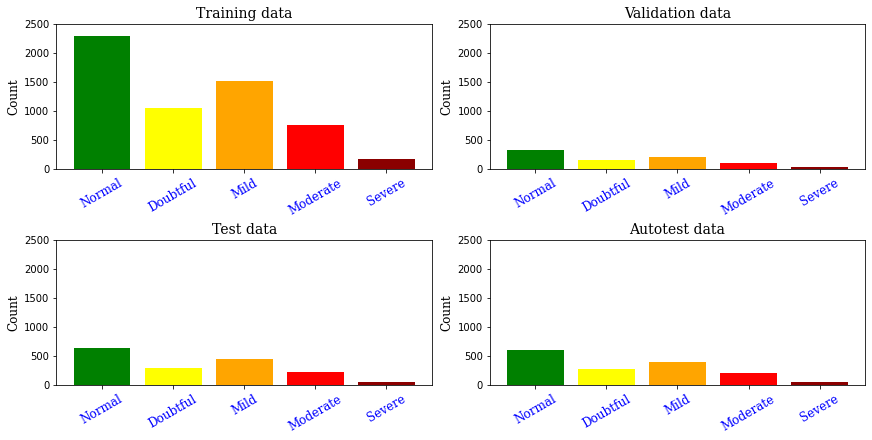

In [34]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 6))

ax = iter(axs.flat)
barPlot_KLgrading(next(ax),train_KLfrequencies[:,0],train_KLfrequencies[:,1],
                  'Training data','Count', [0, 2500])
barPlot_KLgrading(next(ax),val_KLfrequencies[:,0],val_KLfrequencies[:,1],
                  'Validation data','Count', [0, 2500])
barPlot_KLgrading(next(ax),test_KLfrequencies[:,0],test_KLfrequencies[:,1],
                  'Test data','Count', [0, 2500])
barPlot_KLgrading(next(ax),autotest_KLfrequencies[:,0],autotest_KLfrequencies[:,1],
                  'Autotest data','Count', [0, 2500])

Here, out of these 4 imbalanced datasets (`train`, `validation`, `test`, and `autotest`), we will essentially need the datasets of train, validation, and test to build a predictive deep learning model for this project. But, we will not throw the `autotest` dataset. When new or additional data is available, there are typically a few ways to incorporfate it. See https://machinelearningmastery.com/update-neural-network-models-with-more-data/ for more details. In our case, we will simply combine all the four data sets above first to carry out rest of this "Data Wrangling" step and "Exploratory Data Analysis" step. Later, we will spilt the combined data set appropriately into train, validation, and test sets to build and validate our predictive model.

Now let us see the **normalized distribution** of data in each of these folders. We will use the same function `barPlot_KLgrading()` but use, for example, for `train` images `ydata` as `train_KLfrequencies[:,1]/np.sum(train_KLfrequencies[:,1])`.

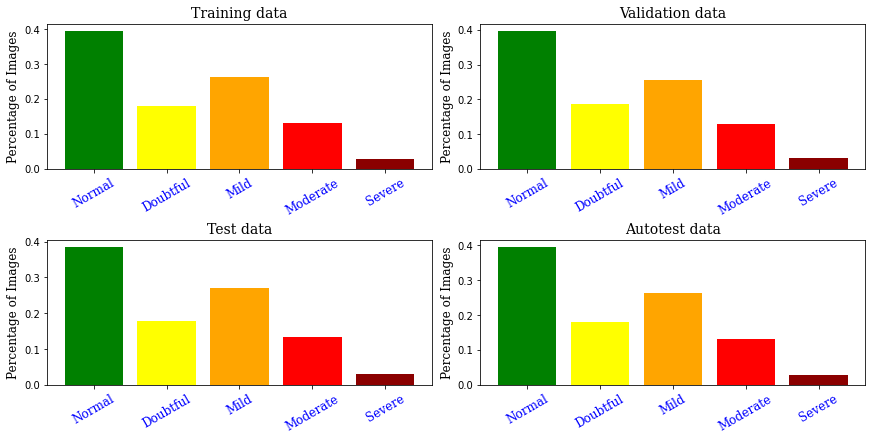

In [35]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 6))

ax = iter(axs.flat)
barPlot_KLgrading(next(ax),train_KLfrequencies[:,0],
                  train_KLfrequencies[:,1]/np.sum(train_KLfrequencies[:,1]),
                  'Training data','Percentage of Images')
barPlot_KLgrading(next(ax),val_KLfrequencies[:,0],
                  val_KLfrequencies[:,1]/np.sum(val_KLfrequencies[:,1]),
                  'Validation data','Percentage of Images')
barPlot_KLgrading(next(ax),test_KLfrequencies[:,0],
                  test_KLfrequencies[:,1]/np.sum(test_KLfrequencies[:,1]),
                  'Test data','Percentage of Images')
barPlot_KLgrading(next(ax),autotest_KLfrequencies[:,0],
                  autotest_KLfrequencies[:,1]/np.sum(autotest_KLfrequencies[:,1]),
                  'Autotest data','Percentage of Images')

It is good to note that the images in different subfolders are actually stratified. There are 1526 images in the 'Autotest' folder. As mentioned above, we will use these images as well in our modeling. So, we will now create a folder 'temp' and copy all the images of each class from all the other existing folders ('train', 'val', and 'test', and 'autotest') into the corresponding subfolders '0', '1', etc. of the 'temp' under the 'KneeXrayImages' folder.

In [36]:
# Make a new folder 'temp' and sub folders as per the classes required

combined_folder = 'temp/'

# Check whether the combined_folder is an existing directory or not
isdir = os.path.isdir(image_folder_path + combined_folder)
if isdir:
    # If the combined_folder exists, then remove it
    print(f"\nRemoving existing folder: {image_folder_path + combined_folder}")
    shutil.rmtree(image_folder_path + combined_folder)
    
os.mkdir(image_folder_path + combined_folder)
os.mkdir(image_folder_path + combined_folder + '0')
os.mkdir(image_folder_path + combined_folder + '1')
os.mkdir(image_folder_path + combined_folder + '2')
os.mkdir(image_folder_path + combined_folder + '3')
os.mkdir(image_folder_path + combined_folder + '4')
    


Removing existing folder: KneeXrayImages/temp/


In [37]:
# Path where all the images will be combined and stored in the newly defined 
# folder
combined_folder_path = image_folder_path + combined_folder

for folder in os.listdir(image_folder_path): 
    
    if folder in (['train','test','val','auto_test']):
        existing_folder_path = image_folder_path + folder + '/'
               
        for class_subfolder in os.listdir(existing_folder_path):
            if class_subfolder in (['0','1','2','3', '4']):
                print(f"\n(folder, class subfolder): {folder, class_subfolder}")
                dest_dir_path = combined_folder_path + class_subfolder + '/'
                print(f"destination: {dest_dir_path}\n")
                class_subfolder_path = existing_folder_path + class_subfolder + '/'
            
                for image_file in os.listdir(class_subfolder_path):
                
                    image_file_path = class_subfolder_path + image_file
                    
                    # Note we already verified that all image are in ".png" format
                    shutil.copy(image_file_path, dest_dir_path)
                    
                    # if image_name.endswith(".png"): 
                    #     shutil.copy(image_file_path, dest_dir_path)


(folder, class subfolder): ('test', '0')
destination: KneeXrayImages/temp/0/


(folder, class subfolder): ('test', '1')
destination: KneeXrayImages/temp/1/


(folder, class subfolder): ('test', '4')
destination: KneeXrayImages/temp/4/


(folder, class subfolder): ('test', '3')
destination: KneeXrayImages/temp/3/


(folder, class subfolder): ('test', '2')
destination: KneeXrayImages/temp/2/


(folder, class subfolder): ('auto_test', '0')
destination: KneeXrayImages/temp/0/


(folder, class subfolder): ('auto_test', '1')
destination: KneeXrayImages/temp/1/


(folder, class subfolder): ('auto_test', '4')
destination: KneeXrayImages/temp/4/


(folder, class subfolder): ('auto_test', '3')
destination: KneeXrayImages/temp/3/


(folder, class subfolder): ('auto_test', '2')
destination: KneeXrayImages/temp/2/


(folder, class subfolder): ('train', '0')
destination: KneeXrayImages/temp/0/


(folder, class subfolder): ('train', '1')
destination: KneeXrayImages/temp/1/


(folder, class subfolder

## 1.5 Display of Gradings for Combined Data<a id='1.5_Display_of_Gradings_for_Combined_Data'></a>

Let us repeat all the steps of 

i)   creating sub folder,

ii)  finding maximum & minimum dimensions of the image

iii) load the combined data

In [38]:
# All images folder
print(f"Floder path of all images: {combined_folder_path}")

Floder path of all images: KneeXrayImages/temp/


In [39]:
all_image_count, all_subfolder  = findSubfolder_files(combined_folder_path)

               Subfolder  # of images
0  KneeXrayImages/temp/0         3857
1  KneeXrayImages/temp/1         1770
2  KneeXrayImages/temp/2         2578
3  KneeXrayImages/temp/3         1286
4  KneeXrayImages/temp/4          295
Total files: 9786


In [40]:
maxXall, minXall, maxYall, minYall, max_channelAll, min_channelAll = find_imageShape(all_subfolder)
print((maxXall, minXall), (maxYall, minYall), (max_channelAll, min_channelAll))

Total image files in .png format: 9786
(224, 224) (224, 224) (1, 1)


In [41]:
# Load set of images
all_images = load_images(combined_folder_path)

Found 9786 files belonging to 5 classes.


In [42]:
# Combined Images:
number_of_allBatches = -(-all_image_count//batch_size)

print('Number of combined data batches: ' + str(number_of_allBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** test images
all_KLfrequencies = findFrequenciesKLgrading(all_images,number_of_allBatches)


Number of combined data batches: 306


            # of images
KL Grading             
0                  3857
1                  1770
2                  2578
3                  1286
4                   295


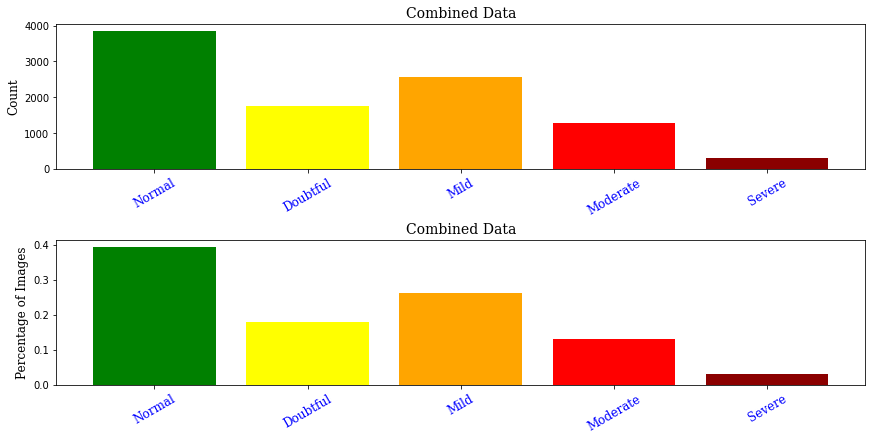

In [43]:
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(12, 6))
#fig, axs = plt.plot(figsize=(12, 6))

ax = iter(axs.flat)

barPlot_KLgrading(next(ax),all_KLfrequencies[:,0],all_KLfrequencies[:,1],
                  'Combined Data','Count')

barPlot_KLgrading(next(ax),all_KLfrequencies[:,0],
                  all_KLfrequencies[:,1]/np.sum(all_KLfrequencies[:,1]),
                  'Combined Data','Percentage of Images')

## 1.6 Visualize a Few Images<a id='1.6_Visualize_a_Few_Images'></a>

Before dealing with **imbalancedness of the datasets**, let us display a few representative images of different KL grading below. We will simply use the combined set of images for this purpose. To plot the images, we will scale the image values between `(vmin, vmax) = (black, white) = (0, 255)`.

In [44]:
all_class_names = all_images.class_names
print(all_class_names)

['0', '1', '2', '3', '4']


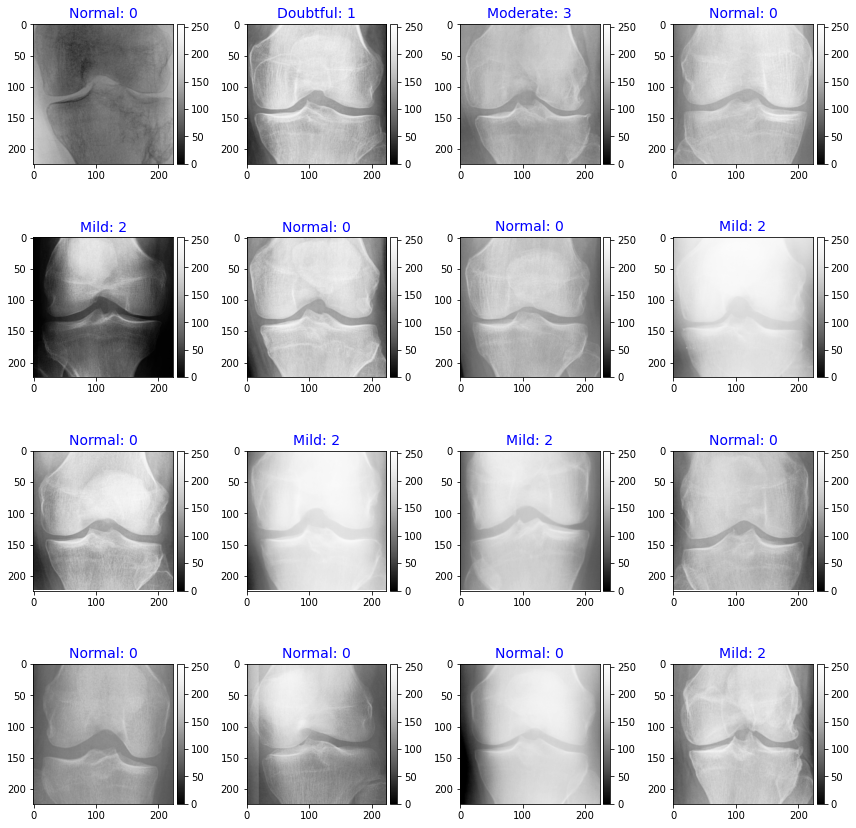

In [45]:
# Ref: https://www.tensorflow.org/tutorials/images/classification

black = 0
white = 255

plt.figure(figsize = (12,12))

for images, labels in all_images.take(1):
    for i in range(16):
        plt_label = KL_grading[labels[i]]+': '+all_class_names[labels[i]]
        ax = plt.subplot(4, 4, i + 1)
        
        # Other options:
        # https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
        # img = mpimg.imread('stinkbug.png')
        # imgplot = plt.imshow(img)
        
        # plt.imshow(images[i].numpy().astype("uint8"))
        
        # Ref: cmap list: https://matplotlib.org/stable/tutorials/colors/colormaps.html
        # normalized_image = (images[i].numpy()-np.min(images[i].numpy()))/(np.max(images[i].numpy())-np.min(images[i].numpy()))
        # imgplot  = ax.imshow(normalized_image, cmap='Greys_r')
        
        imgplot  = ax.imshow(images[i], vmin = black, vmax = white, cmap='Greys_r')
        ax.set_title(plt_label,color='blue', fontsize=14)

        # How to create colorbar?
        # Ans: https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
        # Create an Axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(imgplot, cax=cax)
    
    plt.tight_layout()
    plt.show()

We see that the articular cartilage (the "gap") between two bones in the knee are clearly visible for 'Normal' ('0') and 'Doubtful' ('1') conditions, while the articular cartilage degenerates or breaks down slightly reducuing the "gap" between two bones in the knee for 'Mild' ('2') condition. The degeneration will be increasingly worse as KL grading increases from 'Normal' ('0') to 'Severe' ('4') conditions.

**Side note**: Recall that we set `shuffle='True'` in `load_images()` function defined in "Section 1.3 Load Image Dataset". Therefore, calling this function as `all_images = load_images()` in "Section 1.5 Display of Gradings for Combined Data" will **not** sort the images in alphanumeric order (`shuffle='False'` will do so). So, `all_images.take(1)` in above cell is extracting a random set of images from different classes. If we run the above cell again, it will display a different set of images. Since this is only for display purpose and no analysis is done at this stage, it's fine here. If we would have set `shuffle='False'`, then `.take()` will extract a set of images only from one class from alphanumerically sorted images and we will see above all the images of 'Normal' class.

## 1.7 Remarks on Imbalanced Image Dataset<a id='1.6_Remarks_on_Imbalanced_Image_Dataset'></a>

There are a few optins to deal with this imbalanced dataset of images. We list some of them below:

+ **Class Weights for Imbalanced Datasets**: We can estimate class weights for unbalanced datasets (re: [sklearn.utils.class_weight.compute_class_weight](scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html)) and feed them as parameter `class_weight` to the ML model at the training stage through, for instance, the `.fit()` [method](https://www.tensorflow.org/api_docs/python/tf/keras/Model#:~:text=tf.function.-,fit,-View%20source).

+ Use Improved Loss Function, in particular, **Focal Loss**: The focal loss is an improved version of a cross-entropy loss function. We can use tensorflow to implement focal loss (re: [tfa.losses.SigmoidFocalCrossEntropy](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/SigmoidFocalCrossEntropy) or/and the `focal_loss` [package](https://focal-loss.readthedocs.io/en/latest/index.html)). Focal loss  was first introduced in the RetinaNet paper (https://arxiv.org/pdf/1708.02002.pdf). Focal loss is extremely useful for classification of highly imbalanced datasets. It down-weights well-classified examples and focuses on hard examples. The loss value is much higher for a sample which is misclassified by the classifier as compared to the loss value corresponding to a well-classified example. One of the best use-cases of focal loss is its usage in object detection where the imbalance between the background class and other classes is extremely high.

+ **Synthetic Minority Oversampling Technique (SMOTE)**: [SMOTE](https://arxiv.org/abs/1106.1813) is essentially an oversampling technique that generates synthetic samples from the minority class. **It is applied only in training dataset** not on validation dataset or test dataset. SMOTE helps to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier. There are some  recent and improved variations of this techniqe. See the **Imbalanced-learn** (imported as imblearn) [library](https://imbalanced-learn.org/stable/over_sampling.html#smote-variants) for details and a very recent variation [ASN-SMOTE](https://doi.org/10.1007/s40747-021-00638-w) (re: ASN-SMOTE
Public GitHub [page](https://github.com/yixinkai123/ASN-SMOTE)). Thers is also work particularly for [Deep Learning and SMOTE](https://arxiv.org/pdf/2105.02340.pdf). The **Imbalanced-learn** (imported as `imblearn`) [library](https://imbalanced-learn.org/stable/index.html) also provides many other tools (e.g, random under-sampling, random over-sampling, etc.) to deal with classification of imbalanced data. For a short tutorial on SMOTE, you may refer to this [article](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/). **SMOTE needs to be used** after scaling data etc., i.e., **after `Data Processing`** stage and **before `Training Data`** stage.

**Further Note**: The [original SMOTE approach](https://arxiv.org/abs/1106.1813) is applicable only for tabular data or where the dimension of data is <= 2. To apply SMOTE on imbalanced image dataset, we will need to `.reshape` our X_train and X_smote depending upon our approach or implementation adopted (re: this [article](https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad), or this [discussion](https://stackoverflow.com/questions/53666759/use-smote-to-oversample-image-data), or this [one](https://datascience.stackexchange.com/questions/62759/how-do-i-run-smote-on-image-data-using-the-packages-available). 

## 1.8 Save data<a id='1.8_Save_data'></a>

In [46]:
# Source: https://stackoverflow.com/questions/6568007/how-do-i-save-and-restore-multiple-variables-in-python

# combined_folder_path, KL_grading, all_class_names, image_size, and channel
# are saved here...

# Saving the variables:
with open('2_DataWrangling.pkl', 'wb') as f:
    pickle.dump([combined_folder_path, KL_grading,
                 all_class_names, image_size, channel,
                 black, white], f)